## Homework_16 神经网络基础   
教师：胡俊峰



## 第二部分：神经网络基础(5分)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

2.1补全下列常用的激活函数及其导数,熟记并画出它们的图像（2分），你也可以查阅资料后补充一些其它常用的激活函数（不计分）

In [16]:
def sigmoid(x):
    #todo
    return 1.0/(1.0 + np.exp(-x))

def d_sigmoid(x):
    #todo
    s = sigmoid(x)
    return s * (1 - s)

def ReLU(x):
    #todo
    return np.maximum(0, x)

def d_ReLU(x):
    #todo
    return 1 if x > 0 else 0

def Tanh(x):
    #todo
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def d_Tanh(x):
    #todo
    t = Tanh(x)
    return 1 - t ** 2


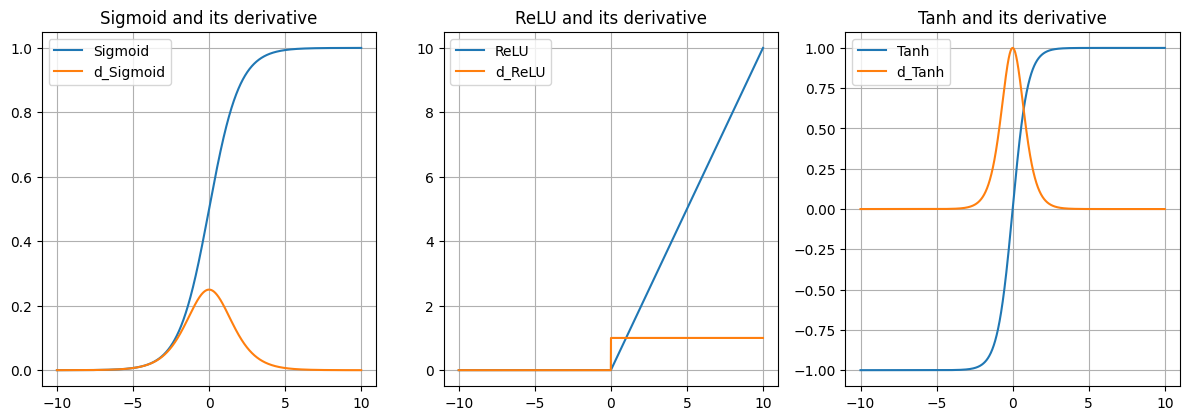

In [17]:
#画出上述常用激活函数与对应导数在区间[-10,10]的图像
#todo
x = np.linspace(-10, 10, 4000)
y_sigmoid = np.vectorize(sigmoid)(x)
y_d_sigmoid = np.vectorize(d_sigmoid)(x)
y_ReLU = np.vectorize(ReLU)(x)
y_d_ReLU = np.vectorize(d_ReLU)(x)
y_Tanh = np.vectorize(Tanh)(x)
y_d_Tanh = np.vectorize(d_Tanh)(x)

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.plot(x, y_sigmoid, label='Sigmoid')
plt.plot(x, y_d_sigmoid, label='d_Sigmoid')
plt.title('Sigmoid and its derivative')
plt.grid(True)
plt.legend()

plt.subplot(232)
plt.plot(x, y_ReLU, label='ReLU')
plt.plot(x, y_d_ReLU, label='d_ReLU')
plt.title('ReLU and its derivative')
plt.grid(True)
plt.legend()

plt.subplot(233)
plt.plot(x, y_Tanh, label='Tanh')
plt.plot(x, y_d_Tanh, label='d_Tanh')
plt.title('Tanh and its derivative')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

2.2使用反向传播算法，用三次函数拟合sin(x)函数在$[-\pi,\pi]$区间的取值（3分）

In [18]:
import matplotlib.pyplot as plt
import numpy as np
 
import  numpy as np
import math
#在区间等距离散采样
x = np.linspace(-math.pi,math.pi,200)
y = np.sin(x)

In [20]:
#初始化a+b*x+c*x^2+d*x^3中的参数a,b,c,d
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-5    #可尝试对比不同的学习率，不计分

In [23]:
for t in range(10000):
    y_pred = a + b*x + c*x**2 + d*x**3
    
    #计算loss（0.5分）
    #todo
    loss = (1/2*np.square(y_pred-y)).sum()
 
    print(t, loss)
    
    #反向传播（1分）
    #todo
    grad_y_pred = 2.0 * (y_pred-y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x ).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
 
    # 更新参数（1分）
    #todo
    a = a - grad_a * learning_rate
    b = b - grad_b * learning_rate
    c = c - grad_c * learning_rate
    d = d - grad_d * learning_rate
 
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')


0 0.4574053532396083
1 0.45740535266264903
2 0.4574053520876857
3 0.4574053515147109
4 0.4574053509437179
5 0.4574053503747004
6 0.45740534980765074
7 0.4574053492425621
8 0.4574053486794286
9 0.4574053481182426
10 0.457405347558998
11 0.45740534700168756
12 0.4574053464463048
13 0.4574053458928429
14 0.4574053453412957
15 0.45740534479165607
16 0.4574053442439173
17 0.4574053436980734
18 0.45740534315411746
19 0.457405342612043
20 0.4574053420718433
21 0.4574053415335121
22 0.45740534099704316
23 0.45740534046242926
24 0.45740533992966503
25 0.4574053393987435
26 0.4574053388696584
27 0.4574053383424028
28 0.45740533781697135
29 0.4574053372933574
30 0.4574053367715539
31 0.4574053362515559
32 0.45740533573335596
33 0.4574053352169486
34 0.4574053347023276
35 0.45740533418948603
36 0.45740533367841874
37 0.4574053331691187
38 0.4574053326615808
39 0.45740533215579793
40 0.45740533165176456
41 0.45740533114947435
42 0.4574053306489218
43 0.4574053301501002
44 0.4574053296530044
45 0.45

画出得到的三次函数与sinx在$[-\pi,\pi]$区间内的图像(0.5分)

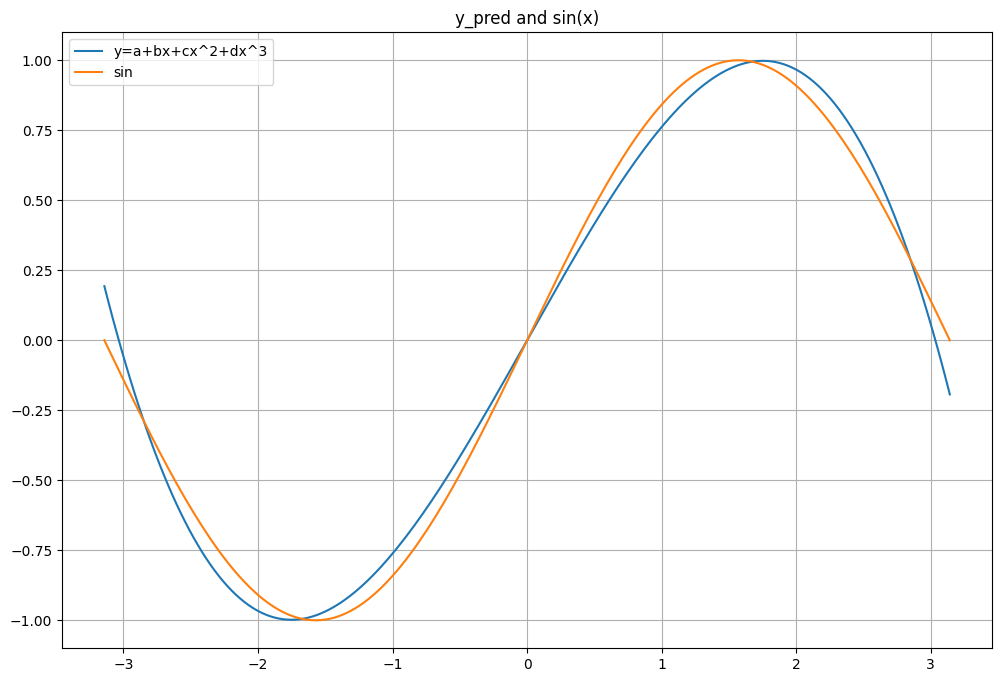

In [24]:
#todo
def three_time(x):
    return a + b*x + c*x**2 + d*x**3

y_pred = np.vectorize(three_time)(x)
plt.figure(figsize=(12, 8))
plt.plot(x, y_pred, label='y=a+bx+cx^2+dx^3')
plt.plot(x, y, label='sin')
plt.title('y_pred and sin(x)')
plt.grid(True)
plt.legend()
plt.show()